# Transit Timing Variations in WASP-12b

Figure 5.7 from Chapter 5 of Ryden, *Celestial and Stellar Dynamics*, Cambridge University Press.

Plot of the observed minus calculated transit time for WASP-12b, assuming a constant period $\mathcal{P}$
using data from Wong et al. [2022, AJ, 163, 175](https://ui.adsabs.harvard.edu/abs/2022AJ....163..175W).

We compute the fit using the quadratic term of Wong et al.'s Eqn 7.5a:
\begin{equation}
   T_{tran}(E) = T_0 + PE + \frac{1}{2}\frac{dP}{dE}E^2
\end{equation}
with best-fit values for $T_0$, $P$, and $dP/dE$ from Equation 8 of Wong et al.

In [4]:
%matplotlib inline

import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)
warnings.filterwarnings('ignore',category=RuntimeWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.  

In [5]:
plotFile = 'Fig5_7.png' 

# graphic aspect ratio = width/height

aspect = 2.5 # 4.0/3.0 # 4:3

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

figFmt = 'png'
dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 10
labelFontSize = 8
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)

# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## TTV data

Data are from Wong et al. 2022 provided by Ian Wong in 4-column ASCII format
 * `Epoch` - transit epoch (integer)
 * `t_0` - transit center time in BJD_TBD days
 * `err_t0` - error in `t_0` in days, we convert to minutes
 * `O-C` - deviation from linear ephemeris (observed-expected) in minutes
 
We also compute the best-fit quadratic term of the TTV O-C using equation 7a and the coefficients from 
Equation 8 in Wong et al. 2022.

In [6]:
ttvFile = 'TTVs/WASP12b.txt' 

data = pd.read_csv(ttvFile,sep=r'\s+',comment='#')

Epoch = np.array(data['Epoch'])
t_0 = np.array(data['t_0'])
err = np.array(data['err_t0'])*60*24 # convert days to minutes

epMin = -2600.0 # transit epoch min/max
epMax = 2400.0

ocMin = -6.0 # max O-C in minutes
ocMax = 3.0

# Quadratic term of best fit (Wong et al. Eqn 8)

T0 = 2457103.283654 # days BJD_TDB
P = 1.091419370 # days
dPdE = -1.031e-9 # days/orbit

# some corrections - reported t_0 at E=0

T_E0 = 2457103.28423 # days
dT0 = (T_E0 - T0)*60*24 

# compute O-C removing the linear ephemeris

OmC = (t_0 - (T0 + P*Epoch))*60*24 + dT0 

# arrays to plot the quadratic part of the best fit

epFit = np.linspace(epMin,epMax,501)
OmCfit = 0.5*dPdE*(60*24)*epFit*epFit + dT0 

## Figure 5.7

TTV curve for WASP-12b with the best-fit quadratic term plotted as a solid line


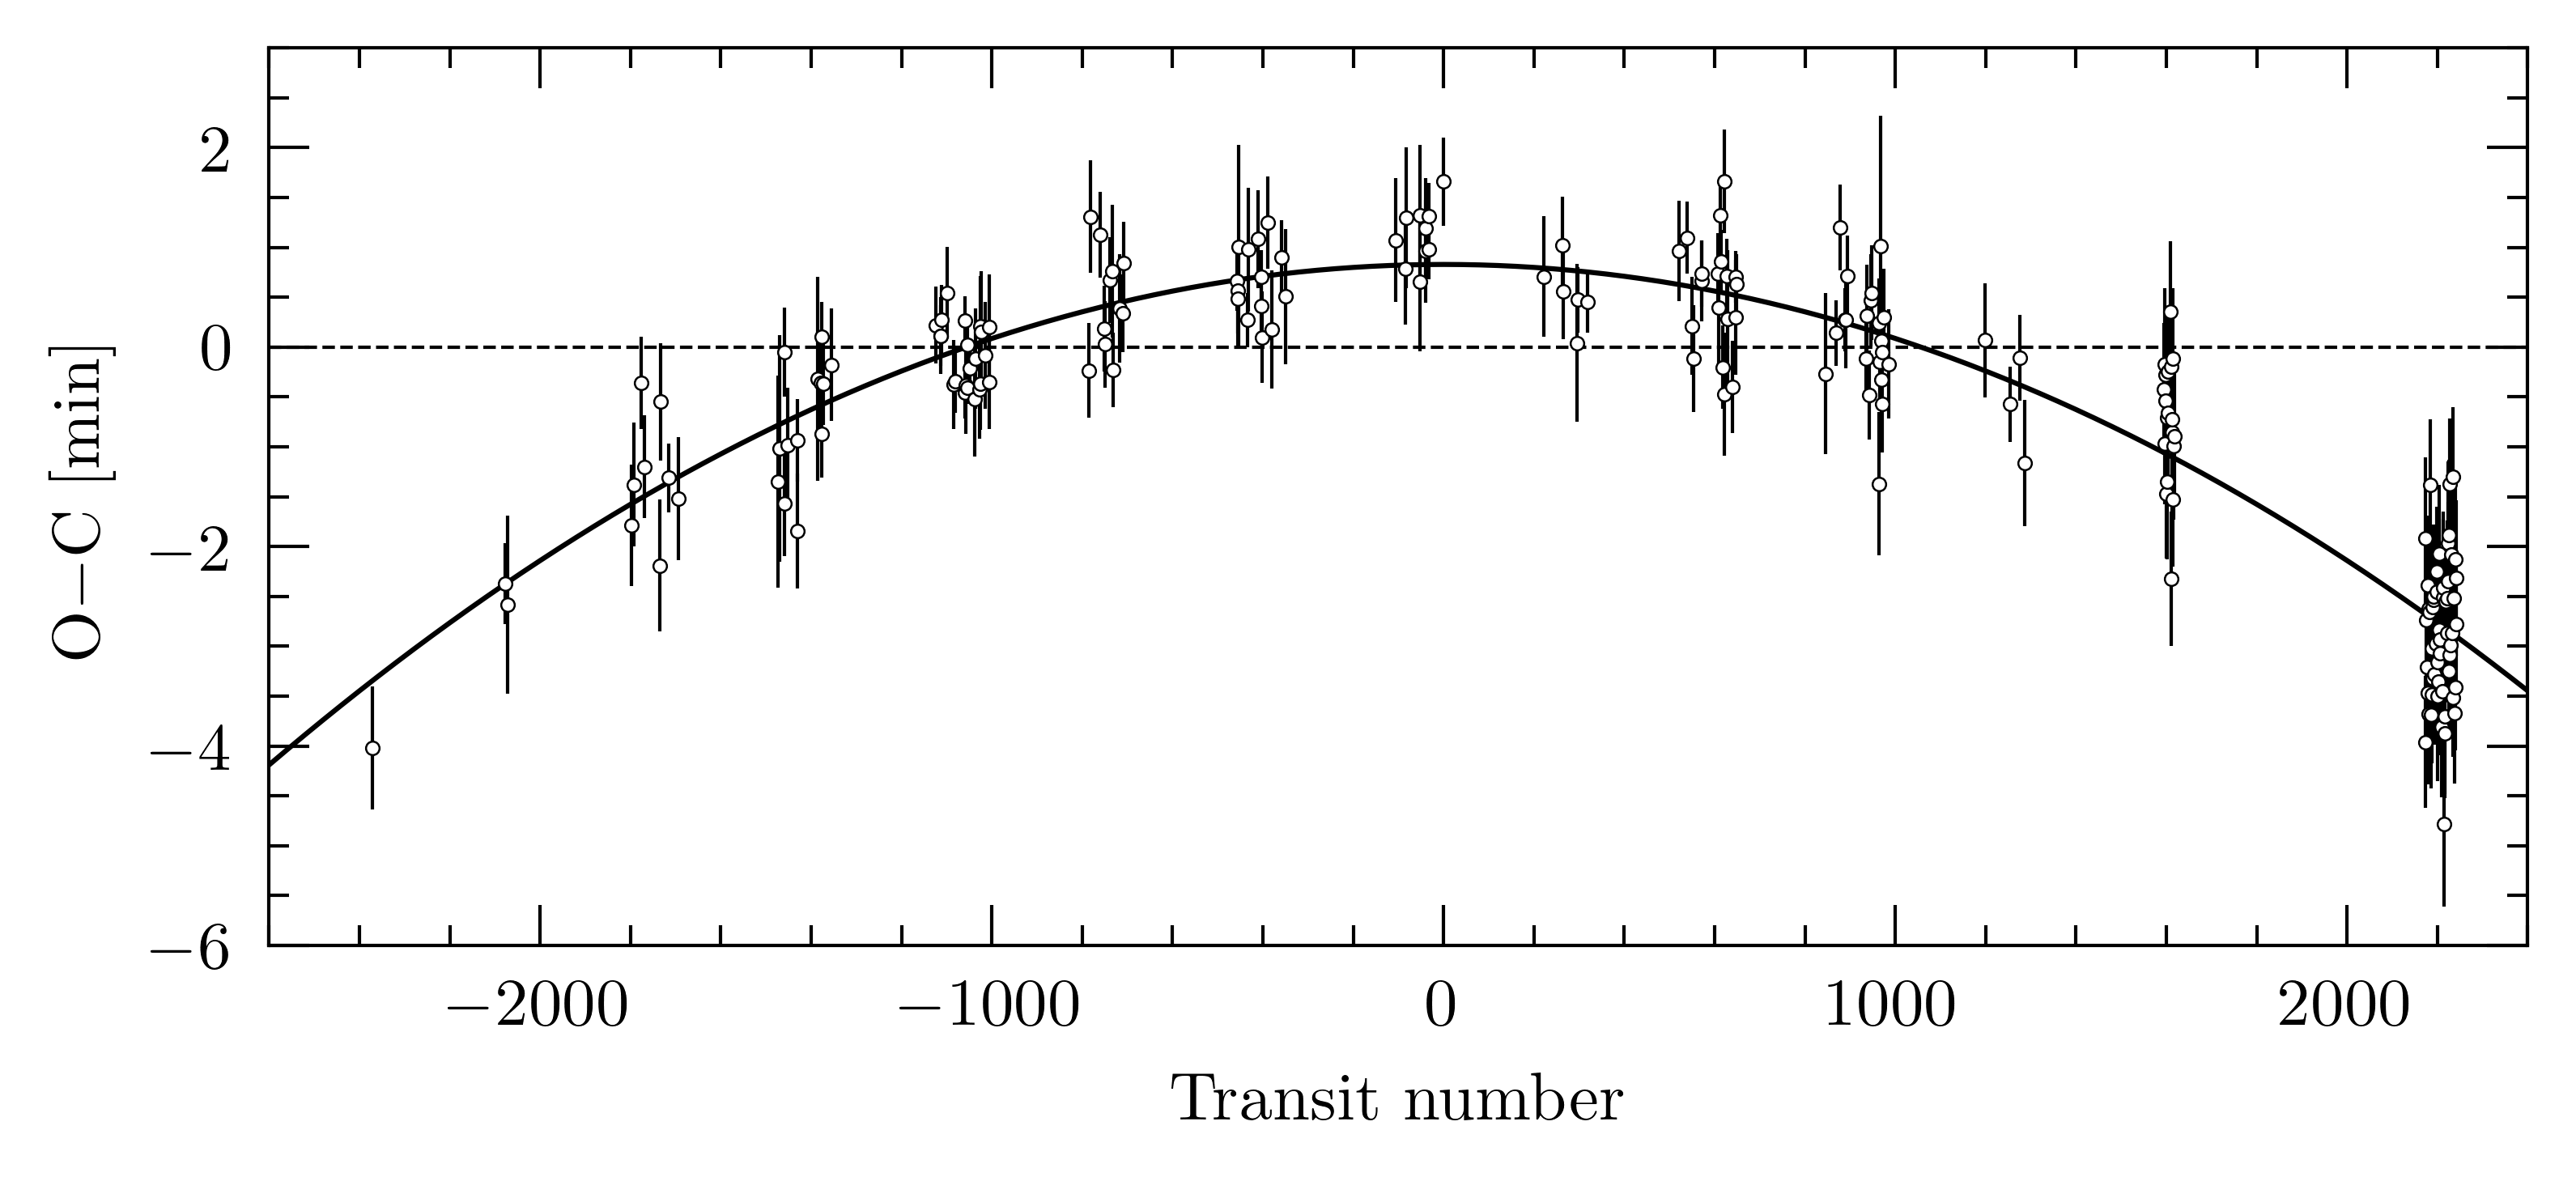

In [7]:
fig,ax = plt.subplots(figsize=(wInches,hInches),dpi=dpi)

ax.tick_params('both',length=6,width=lwidth,which='major',direction='in',top='on',right='on')
ax.tick_params('both',length=3,width=lwidth,which='minor',direction='in',top='on',right='on')

# Limits

ax.set_xlim(epMin,epMax)
ax.xaxis.set_major_locator(MultipleLocator(1000))
ax.xaxis.set_minor_locator(MultipleLocator(200))
ax.set_xlabel(r'Transit number',fontsize=axisFontSize)

ax.set_ylim(ocMin,ocMax)
ax.yaxis.set_major_locator(MultipleLocator(2))
ax.yaxis.set_minor_locator(MultipleLocator(0.5))
ax.set_ylabel(r'O$-$C [min]',fontsize=axisFontSize)

ax.errorbar(Epoch,OmC,xerr=None,yerr=err,fmt='o',ms=2,mfc='white',mec='black',mew=0.3,
            capsize=0.0,elinewidth=0.5,ecolor='black',zorder=10)

ax.plot(epFit,OmCfit,'-',lw=0.75,color='black',zorder=9)
ax.hlines(0.0,epMin,epMax,ls=['--'],colors=['black'],lw=0.5,zorder=8)

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')